 **CV** LAB01**
# PRANAY GUPTA
# 1032211057
# BATCH: A4

In [ ]:
import cv2
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

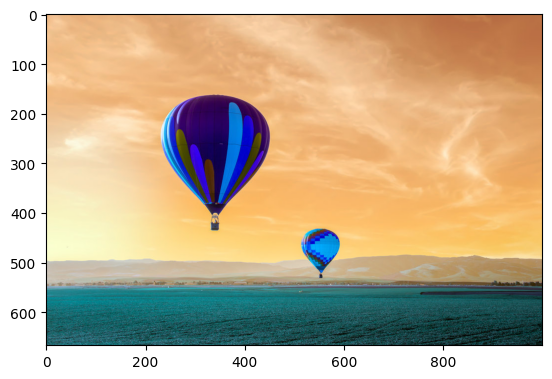

In [ ]:

img = cv2.imread('/content/drive/MyDrive/balloon.jfif')

plt.imshow(img)

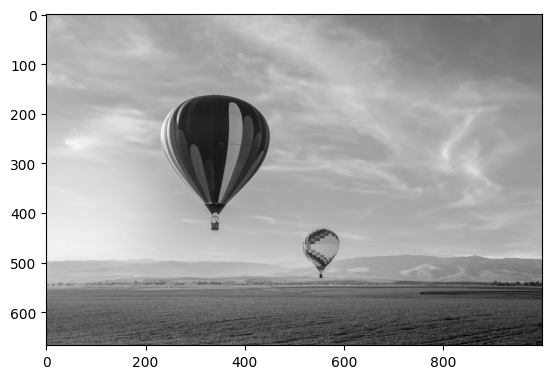

In [ ]:
#converting the color image into grayscale image

img_gray= cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img_gray, cmap="gray")

## **Geometric Transformations**

In [ ]:
img_gray.shape

(667, 1000)

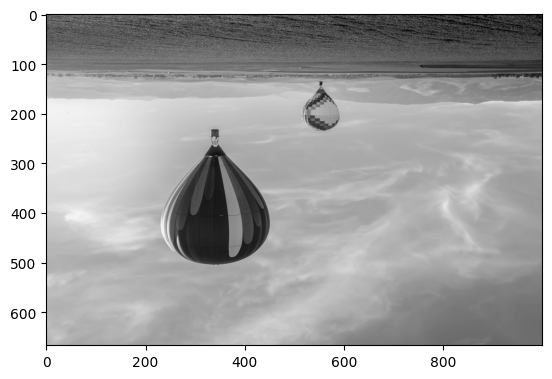

In [ ]:
rows,cols= img_gray.shape
M = np.float32([[1,  0, 0],
                [0, -1, rows],
                [0,  0, 1]])
reflected_img = cv2.warpPerspective(img_gray, M, (int(cols), int(rows)))

plt.imshow(reflected_img, cmap='gray')

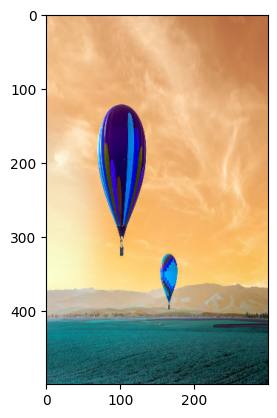

In [ ]:
#Resizing the image

img_resize= cv2.resize(img, (300,500), interpolation =cv2.INTER_LINEAR)     #300 is the width and 500 is the height of the image,
plt.imshow(img_resize)

In [ ]:
#compairing the size of resized and the original image

img.shape, img_resize.shape

((667, 1000, 3), (500, 300, 3))

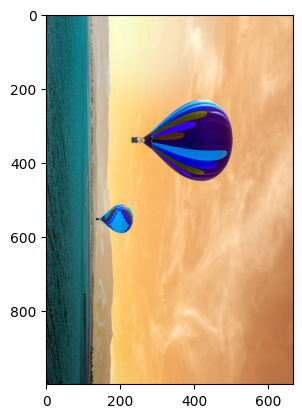

In [ ]:
#rotating an image

img_rotate= cv2.rotate(img, cv2.ROTATE_90_CLOCKWISE)

plt.imshow(img_rotate)

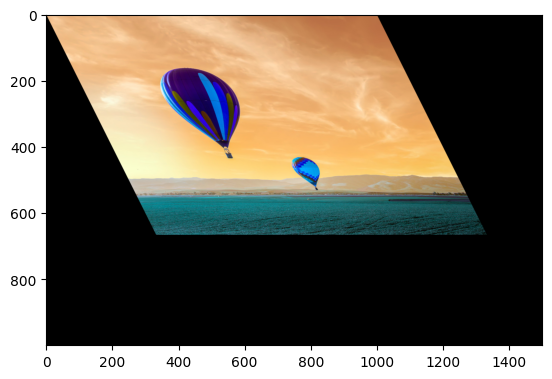

In [ ]:
#SHEARING FO IMAGE

M = np.float32([[1, 0.5, 0], [0, 1, 0], [0, 0, 1]])
sheared_img = cv2.warpPerspective(img, M,
                                 (int(cols*1.5),
                                 int(rows*1.5)))
plt.imshow(sheared_img)

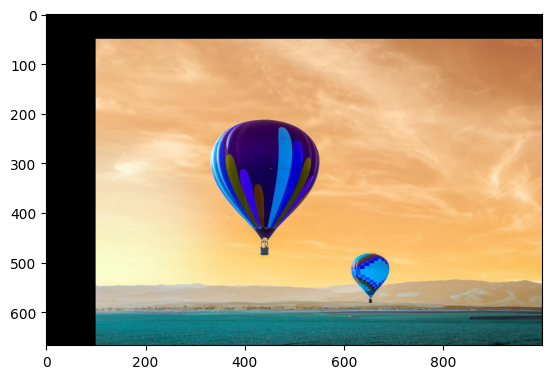

In [ ]:


# TRANSLATION
M = np.float32([[1, 0, 100], [0, 1, 50]])
shifted_img = cv2.warpAffine(img, M, (cols,rows))
plt.imshow(shifted_img)


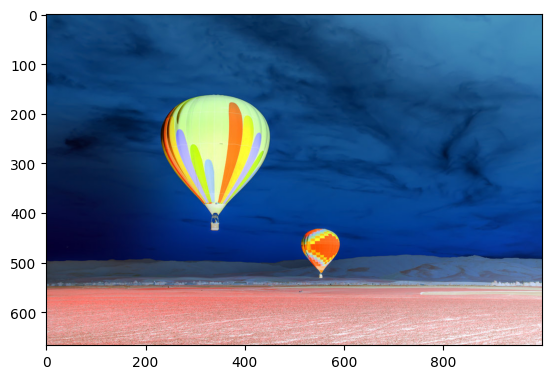

In [ ]:
#negative of an image


colored_negative = abs(255-img)
plt.imshow(colored_negative)

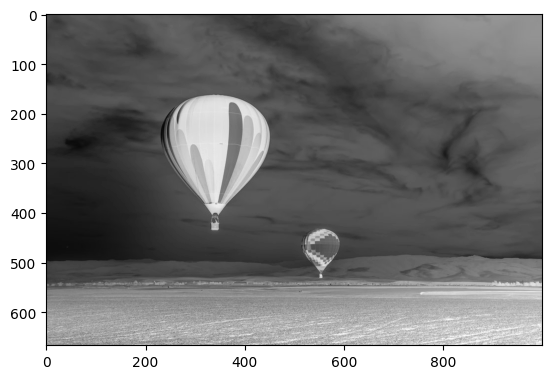

In [ ]:

gray_negative = abs(255-img_gray)
plt.imshow(gray_negative, cmap='gray')

### ADDITION AND SUBTRACTION OF IMAGES

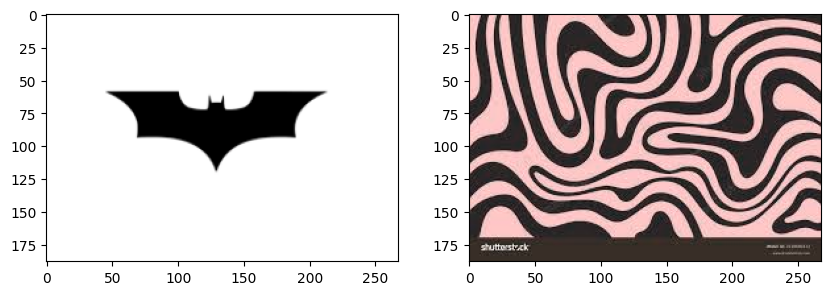

In [ ]:
img1= cv2.imread("/content/drive/MyDrive/batman.png")
img2= cv2.imread("/content/drive/MyDrive/pattern.jpg")
img1 = cv2.resize(img1, (img2.shape[1],img2.shape[0]))

fig,ax= plt.subplots(1,2, figsize= (10,10))
ax[0].imshow(img1)
ax[1].imshow(img2)

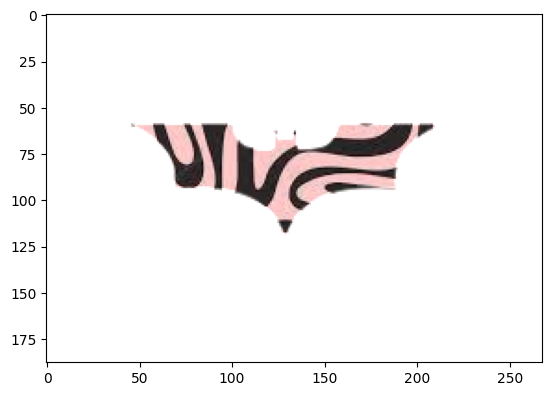

In [ ]:
#merged image

img_add= cv2.add(img1, img2)
plt.imshow(img_add)

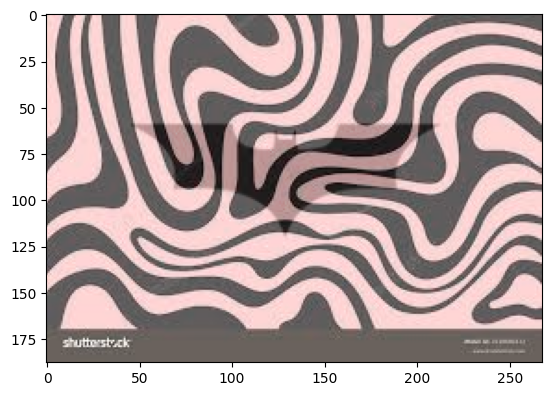

In [ ]:

# WEIGHTED ADDITION

img_weighted = cv2.addWeighted(img1,0.25,img2,0.75,0)
plt.imshow(img_weighted)


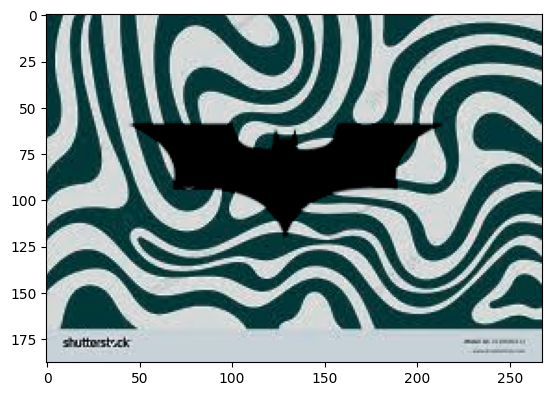

In [ ]:

# SUBTRACTION

sub_img = cv2.subtract(img1,img2)
plt.imshow(sub_img)


### **Create** **Following** **Patterns**

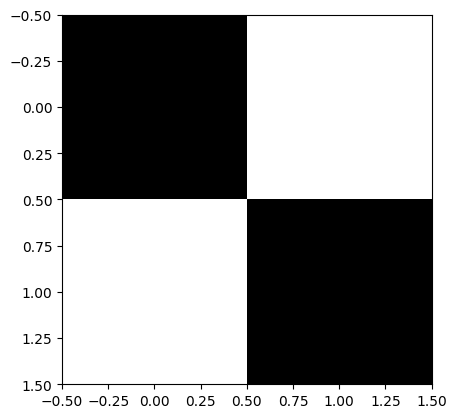

In [ ]:
pttn = np.array([[0,1],[1,0]])
plt.imshow(pttn, cmap='gray')

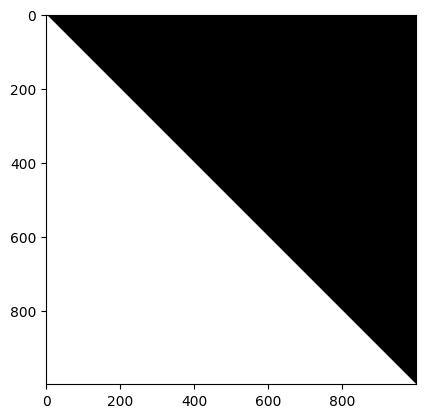

In [ ]:
tri = np.tril(np.ones((1000,1000)))
plt.imshow(tri, cmap='gray')

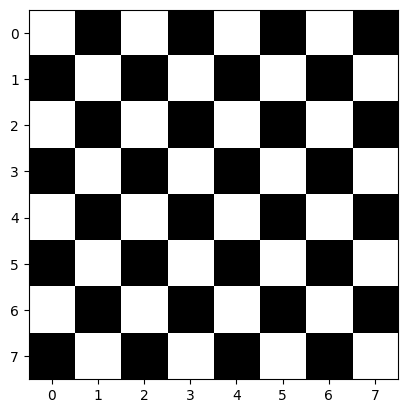

In [ ]:
chess = np.array([[1,0,1,0,1,0,1,0],
                  [0,1,0,1,0,1,0,1],
                  [1,0,1,0,1,0,1,0],
                  [0,1,0,1,0,1,0,1],
                  [1,0,1,0,1,0,1,0],
                  [0,1,0,1,0,1,0,1],
                  [1,0,1,0,1,0,1,0],
                  [0,1,0,1,0,1,0,1]])
plt.imshow(chess, cmap='gray')

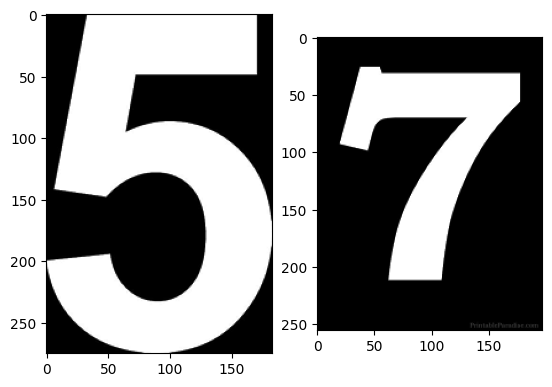

In [ ]:

img1 = abs(255-cv2.imread('/content/drive/MyDrive/5.png'))
img2 = abs(255-cv2.imread('/content/drive/MyDrive/7.png'))
f, ax = plt.subplots(1,2)
ax[0].imshow(img1)
ax[1].imshow(img2)

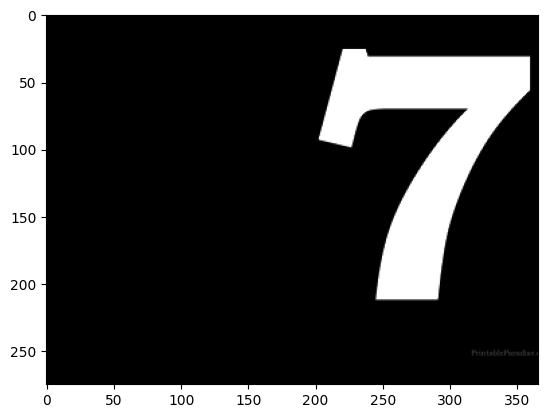

In [ ]:

# Translating 2nd digit
M = np.float32([[1, 0, img1.shape[1]], [0, 1, 0]])
img2 = cv2.warpAffine(img2, M, (2*img1.shape[1],img1.shape[0]))
plt.imshow(img2)


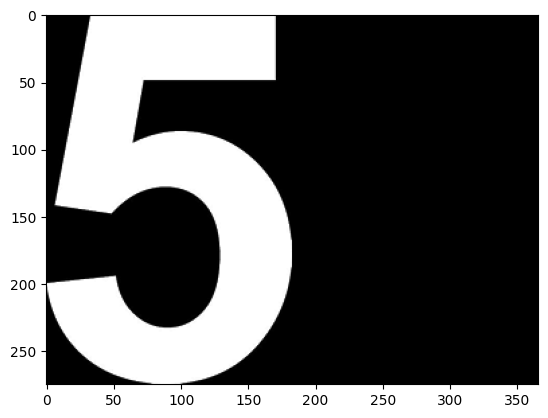

In [ ]:

# Making size of images same
pad_width = img2.shape[1] - img1.shape[1]
img1 = np.pad(img1, ((0, 0), (0, pad_width), (0, 0)), mode='constant', constant_values=0)
plt.imshow(img1)

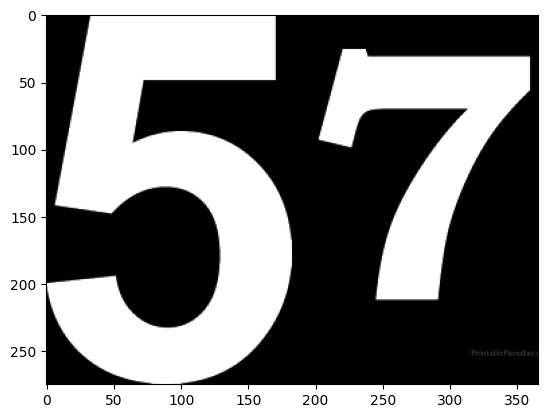

In [ ]:

# Adding the two images
rollno = cv2.add(img1,img2)
plt.imshow(rollno)


### Display distance patterns for D4, D8 and De.

In [ ]:
def manhattan(pt1, pt2):
    return abs(pt1[0] - pt2[0]) + abs(pt1[1] - pt2[1])

def euclidean(pt1, pt2):
    return math.sqrt((pt1[0] - pt2[0])**2 + (pt1[1] - pt2[1])**2)

def chessboard(pt1, pt2):
    return max(abs(pt1[0] - pt2[0]), abs(pt1[1] - pt2[1]))

NameError: name 'math' is not defined

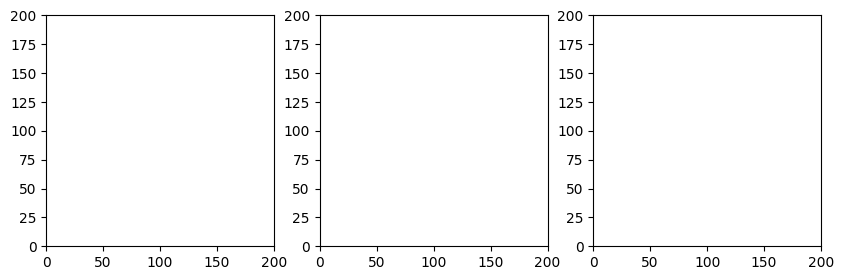

In [ ]:
f, ax = plt.subplots(1,3,figsize=(10,3))
for a in ax:
    a.set_xlim(0, 200)
    a.set_ylim(0, 200)

x,y = 100,100
D = 50
points = []

for i in range(-D, D + 1):
    for j in range(-D, D + 1):
        if euclidean((x, y), (x + i, y + j)) <= D:
            points.append((x + i, y + j))
ax[0].scatter([p[0] for p in points], [p[1] for p in points])
ax[0].set_title("Euclidean Distance Pattern")

points = []
for i in range(-D, D + 1):
    for j in range(-D, D + 1):
        if chessboard((x, y), (x + i, y + j)) <= D:
            points.append((x + i, y + j))
ax[1].scatter([p[0] for p in points], [p[1] for p in points])
ax[1].set_title("Chessboard Distance Pattern")

points = []
for i in range(-D, D + 1):
    for j in range(-D, D + 1):
        if manhattan((x, y), (x + i, y + j)) <= D:
            points.append((x + i, y + j))
ax[2].scatter([p[0] for p in points], [p[1] for p in points])
ax[2].set_title("Manhattan Distance Pattern")